<a href="https://colab.research.google.com/github/Ashitha-K/Assignment/blob/main/Virtual_competetion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
data=pd.read_csv('/content/train_ctrUa4K.csv') # training dataset
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**Exploratory data analysis**

In [264]:
data.shape

(614, 13)

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [266]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [267]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [268]:
#Handling missing values
data['Gender'].unique()


array(['Male', 'Female', nan], dtype=object)

In [269]:
for i in ['Gender','Married','Self_Employed','Dependents']:
  mode_value = data[i].mode()[0]
  data[i]=data[i].fillna(mode_value)


In [270]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  data[i]=data[i].fillna(data[i].median())


In [271]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

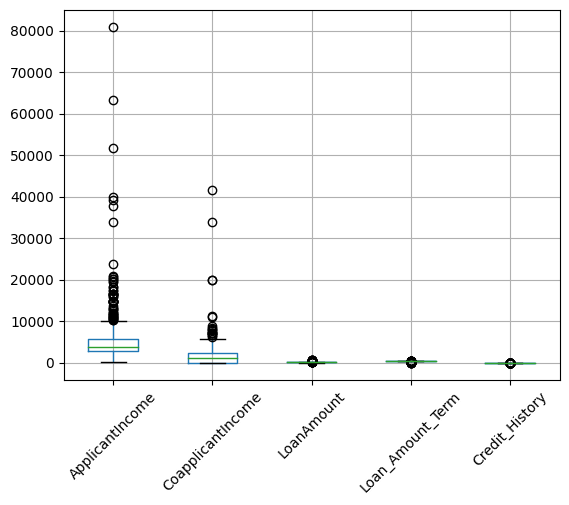

In [272]:
#outlier detection
data.boxplot()
plt.xticks(rotation=45)

In [273]:
outlier_checking = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
Q1 = data[outlier_checking].quantile(0.25)
Q3 = data[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = data[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = data[outlier_checking]>(Q3 + 1.5*IQR)
print(data[outlier_checking])


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4            

In [274]:
#clip the outlier
data[outlier_checking] = data[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

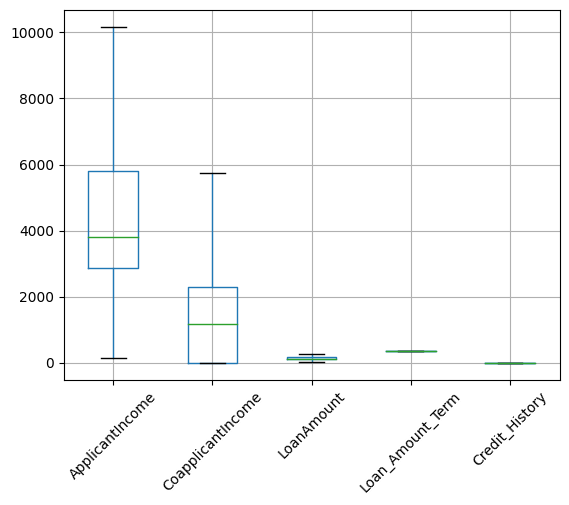

In [275]:
data.boxplot()
plt.xticks(rotation=45)

In [276]:
#Encoding
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [277]:
data.drop('Loan_ID',axis=1,inplace=True)

In [278]:
data['Property_Area']=le.fit_transform(data['Property_Area'])

In [279]:
data['Dependents']=le.fit_transform(data['Dependents'])

In [280]:
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

In [281]:
data=pd.get_dummies(data)

In [282]:
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5849.0,0.0,128.0,360.0,1.0,2,1,False,True,True,False,True,False,True,False
1,1,4583.0,1508.0,128.0,360.0,1.0,0,0,False,True,False,True,True,False,True,False
2,0,3000.0,0.0,66.0,360.0,1.0,2,1,False,True,False,True,True,False,False,True
3,0,2583.0,2358.0,120.0,360.0,1.0,2,1,False,True,False,True,False,True,True,False
4,0,6000.0,0.0,141.0,360.0,1.0,2,1,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,0.0,71.0,360.0,1.0,0,1,True,False,True,False,True,False,True,False
610,3,4106.0,0.0,40.0,360.0,1.0,0,1,False,True,False,True,True,False,True,False
611,1,8072.0,240.0,253.0,360.0,1.0,2,1,False,True,False,True,True,False,True,False
612,2,7583.0,0.0,187.0,360.0,1.0,2,1,False,True,False,True,True,False,True,False


In [283]:
data.shape

(614, 16)

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dependents              614 non-null    int64  
 1   ApplicantIncome         614 non-null    float64
 2   CoapplicantIncome       614 non-null    float64
 3   LoanAmount              614 non-null    float64
 4   Loan_Amount_Term        614 non-null    float64
 5   Credit_History          614 non-null    float64
 6   Property_Area           614 non-null    int64  
 7   Loan_Status             614 non-null    int64  
 8   Gender_Female           614 non-null    bool   
 9   Gender_Male             614 non-null    bool   
 10  Married_No              614 non-null    bool   
 11  Married_Yes             614 non-null    bool   
 12  Education_Graduate      614 non-null    bool   
 13  Education_Not Graduate  614 non-null    bool   
 14  Self_Employed_No        614 non-null    bo

In [285]:
#converting boolean to numbers
for column in data.columns:
  if data[column].dtype=='bool':
    data[column]=data[column].astype(int)

In [286]:
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5849.0,0.0,128.0,360.0,1.0,2,1,0,1,1,0,1,0,1,0
1,1,4583.0,1508.0,128.0,360.0,1.0,0,0,0,1,0,1,1,0,1,0
2,0,3000.0,0.0,66.0,360.0,1.0,2,1,0,1,0,1,1,0,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,2,1,0,1,0,1,0,1,1,0
4,0,6000.0,0.0,141.0,360.0,1.0,2,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,0.0,71.0,360.0,1.0,0,1,1,0,1,0,1,0,1,0
610,3,4106.0,0.0,40.0,360.0,1.0,0,1,0,1,0,1,1,0,1,0
611,1,8072.0,240.0,253.0,360.0,1.0,2,1,0,1,0,1,1,0,1,0
612,2,7583.0,0.0,187.0,360.0,1.0,2,1,0,1,0,1,1,0,1,0


In [290]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [291]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [360]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y)

In [ ]:
data.head()

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [362]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

Accuracy is 0.6558441558441559
Precision is 0.6535947712418301
Recall is 1.0
f1 score is 0.790513833992095


In [316]:
data_test=pd.read_csv('/content/test_lAUu6dG.csv') # test dataset
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [317]:
data.shape

(614, 16)

In [318]:
data_test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [319]:
for i in ['Gender','Married','Self_Employed','Dependents']:
  mode_value = data_test[i].mode()[0]
  data_test[i]=data_test[i].fillna(mode_value)

In [320]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
  data_test[i]=data_test[i].fillna(data_test[i].median())

In [321]:
data.isnull().sum()

,0
Dependents,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0
Loan_Status,0
Gender_Female,0
Gender_Male,0


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

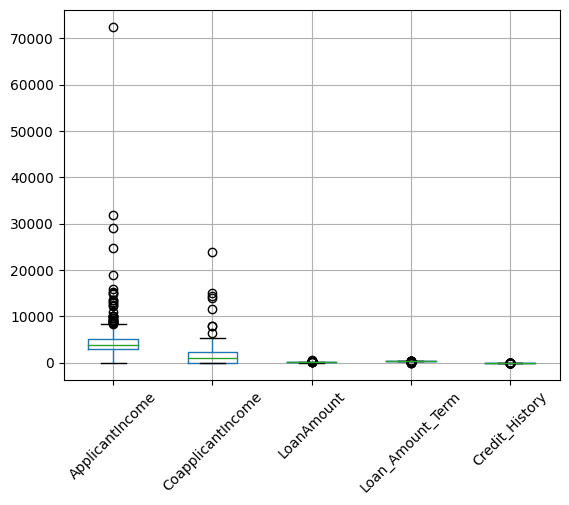

In [322]:
#outlier detection
data_test.boxplot()
plt.xticks(rotation=45)

In [323]:
outlier_checking = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
Q1 = data_test[outlier_checking].quantile(0.25)
Q3 = data_test[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = data_test[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = data_test[outlier_checking]>(Q3 + 1.5*IQR)
print(data[outlier_checking])


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       128.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             360.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4            

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'ApplicantIncome'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'LoanAmount'),
  Text(4, 0, 'Loan_Amount_Term'),
  Text(5, 0, 'Credit_History')])

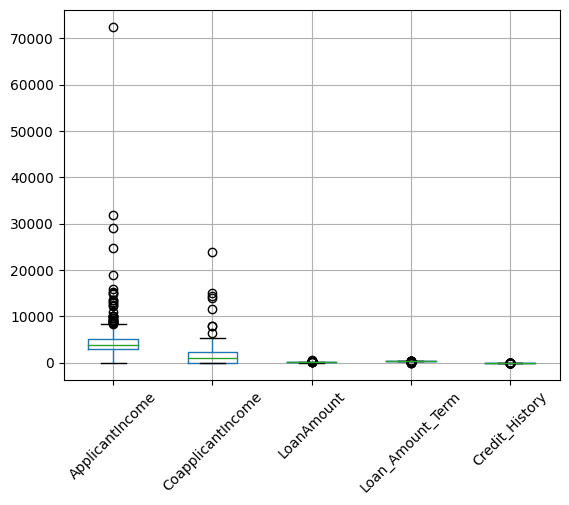

In [325]:
data_test.boxplot()
plt.xticks(rotation=45)

In [326]:
#clip the outlier
data_test[outlier_checking] = data_test[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

In [327]:
#Encoding
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [328]:
data_test.drop('Loan_ID',axis=1,inplace=True)

In [331]:
data_test['Property_Area']=le.fit_transform(data_test['Property_Area'])

In [332]:
data_test['Dependents']=le.fit_transform(data_test['Dependents'])

In [333]:
data_test=pd.get_dummies(data_test)
data_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5720,0.0,110.0,360.0,1.0,2,False,True,False,True,True,False,True,False
1,1,3076,1500.0,126.0,360.0,1.0,2,False,True,False,True,True,False,True,False
2,2,5000,1800.0,208.0,360.0,1.0,2,False,True,False,True,True,False,True,False
3,2,2340,2546.0,100.0,360.0,1.0,2,False,True,False,True,True,False,True,False
4,0,3276,0.0,78.0,360.0,1.0,2,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777.0,113.0,360.0,1.0,2,False,True,False,True,False,True,False,True
363,0,4158,709.0,115.0,360.0,1.0,2,False,True,False,True,True,False,True,False
364,0,3250,1993.0,126.0,360.0,1.0,1,False,True,True,False,True,False,True,False
365,0,5000,2393.0,158.0,360.0,1.0,0,False,True,False,True,True,False,True,False


In [337]:
#converting boolean to numbers
for column in data_test.columns:
  if data_test[column].dtype=='bool':
    data_test[column]=data_test[column].astype(int)

In [338]:
data_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5720,0.0,110.0,360.0,1.0,2,0,1,0,1,1,0,1,0
1,1,3076,1500.0,126.0,360.0,1.0,2,0,1,0,1,1,0,1,0
2,2,5000,1800.0,208.0,360.0,1.0,2,0,1,0,1,1,0,1,0
3,2,2340,2546.0,100.0,360.0,1.0,2,0,1,0,1,1,0,1,0
4,0,3276,0.0,78.0,360.0,1.0,2,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777.0,113.0,360.0,1.0,2,0,1,0,1,0,1,0,1
363,0,4158,709.0,115.0,360.0,1.0,2,0,1,0,1,1,0,1,0
364,0,3250,1993.0,126.0,360.0,1.0,1,0,1,1,0,1,0,1,0
365,0,5000,2393.0,158.0,360.0,1.0,0,0,1,0,1,1,0,1,0


In [345]:

x_test=data_test
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [350]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(x_test)
print('predicted',y_pred)

[[-0.75822199  0.7601616  -0.89210656 ... -0.5448117   0.33484506
  -0.33484506]
 [ 0.18187082 -0.59690741  0.0466227  ... -0.5448117   0.33484506
  -0.33484506]
 [ 1.12196363  0.3906118   0.23436855 ... -0.5448117   0.33484506
  -0.33484506]
 ...
 [-0.75822199 -0.50759954  0.35515172 ... -0.5448117   0.33484506
  -0.33484506]
 [-0.75822199  0.3906118   0.60547952 ... -0.5448117   0.33484506
  -0.33484506]
 [-0.75822199  2.11209798 -0.89210656 ... -0.5448117  -2.98645591
   2.98645591]]
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [363]:
# Checking accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))


Accuracy is 0.6363636363636364
Precision is 0.6405228758169934
Recall is 0.98989898989899
f1 score is 0.7777777777777777
